In [1]:
import pandas as pd

In [26]:
datos_titanic = pd.read_csv("C:/Users/Florencia Cires/OneDrive/Documentos/ML PROYECTS/DATOS/Titanic-Dataset.csv")

In [28]:
# Resumen inicial de los datos
print(datos_titanic.info())

# Visualizar las primeras filas
print(datos_titanic.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

# MANEJO DE DATOS NULLS

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


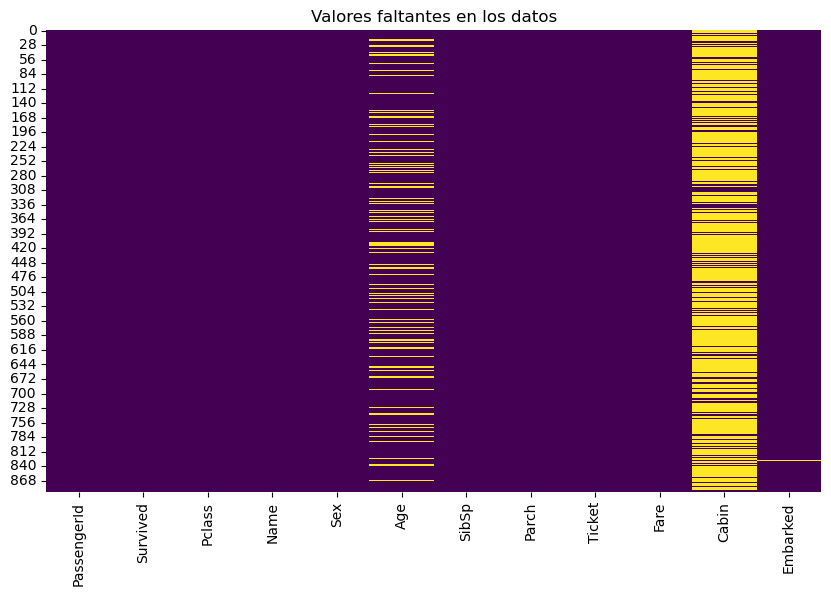

In [8]:
# Identificar columnas con valores faltantes
print(datos_titanic.isnull().sum())

# Visualizar en un gráfico
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(datos_titanic.isnull(), cbar=False, cmap='viridis')
plt.title("Valores faltantes en los datos")
plt.show()


# ARREGLO EL PROBLEMA DE LOS DATOS NULL EN AGE Y CABIN

Imputar usando un modelo predictivo (el enfoque más avanzado)
Se entrena un modelo para predecir la edad en función de otras variables como Pclass, Sex, SibSp, etc.

In [47]:
# Extraer la primera letra de la cabina o asignar 'U' para desconocido
datos_titanic['Cabin'] = datos_titanic['Cabin'].fillna('Unknown')
datos_titanic['CabinLetter'] = datos_titanic['Cabin'].str[0]


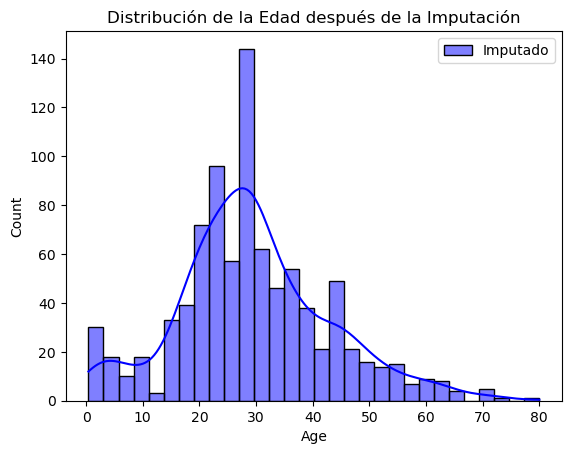

In [49]:
sns.histplot(datos_titanic['Age'], kde=True, bins=30, color='blue', label='Imputado')
plt.legend()
plt.title("Distribución de la Edad después de la Imputación")
plt.show()


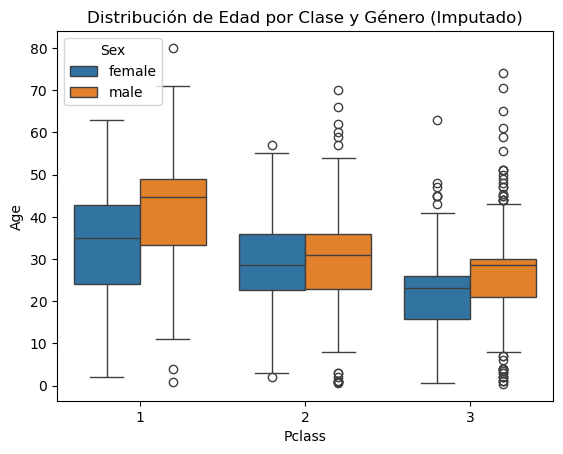

In [51]:
sns.boxplot(data=datos_titanic, x='Pclass', y='Age', hue='Sex')
plt.title("Distribución de Edad por Clase y Género (Imputado)")
plt.show()


# ANALISIS EXPLORATORIO 

DISTRIBUCION SOBREVIVIENTES VS NO SOBREVIVIENTES 

Survived
0    549
1    342
Name: count, dtype: int64


C:\Users\Florencia Cires\AppData\Local\Temp\ipykernel_27824\2318698315.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datos_titanic, x='Survived', palette='pastel')


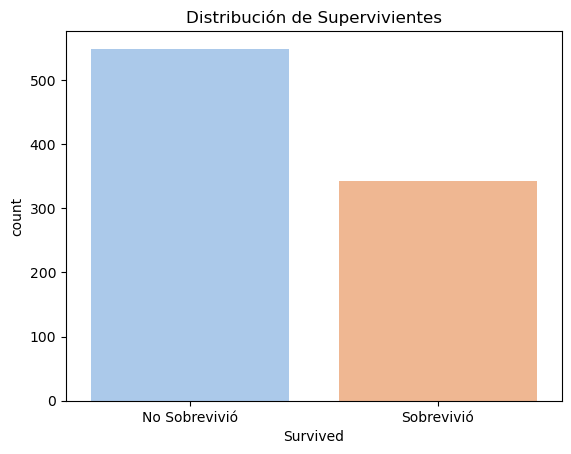

In [54]:
# Conteo de sobrevivientes
print(datos_titanic['Survived'].value_counts())

# Gráfico
sns.countplot(data=datos_titanic, x='Survived', palette='pastel')
plt.title("Distribución de Supervivientes")
plt.xticks([0, 1], ['No Sobrevivió', 'Sobrevivió'])
plt.show()


COMPARACION TASA DE SUPERVIVENCIA POR GENERO 

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


C:\Users\Florencia Cires\AppData\Local\Temp\ipykernel_27824\1372778148.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=datos_titanic, x='Sex', y='Survived', palette='coolwarm')


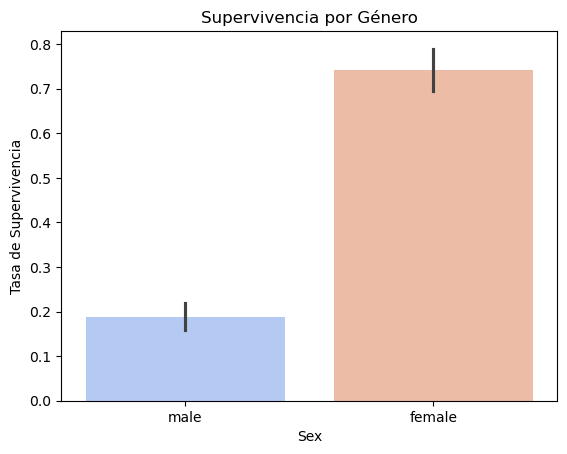

In [58]:
# Tasa de supervivencia por género
print(datos_titanic.groupby('Sex')['Survived'].mean())

# Gráfico
sns.barplot(data=datos_titanic, x='Sex', y='Survived', palette='coolwarm')
plt.title("Supervivencia por Género")
plt.ylabel("Tasa de Supervivencia")
plt.show()


# CONSTRUCCION DE UN MODELO DE CLASIFICACION

In [63]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Rellenar valores faltantes de 'Fare'
datos_titanic['Fare'] = datos_titanic['Fare'].fillna(datos_titanic['Fare'].median())

# Codificar la columna 'Sex' en valores numéricos
datos_titanic['Sex'] = datos_titanic['Sex'].map({'male': 0, 'female': 1})

# Rellenar valores faltantes en la columna 'Age' con la mediana
datos_titanic['Age'] = datos_titanic['Age'].fillna(datos_titanic['Age'].median())

# Seleccionar características y la variable objetivo
X = datos_titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = datos_titanic['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo Random Forest
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.2f}")



Exactitud del modelo: 0.82


## MATRIZ DE CONFUSION

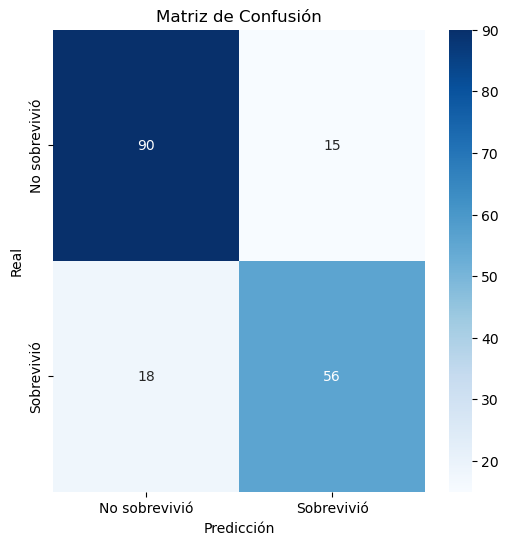

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


# CURVA ROC AUC 

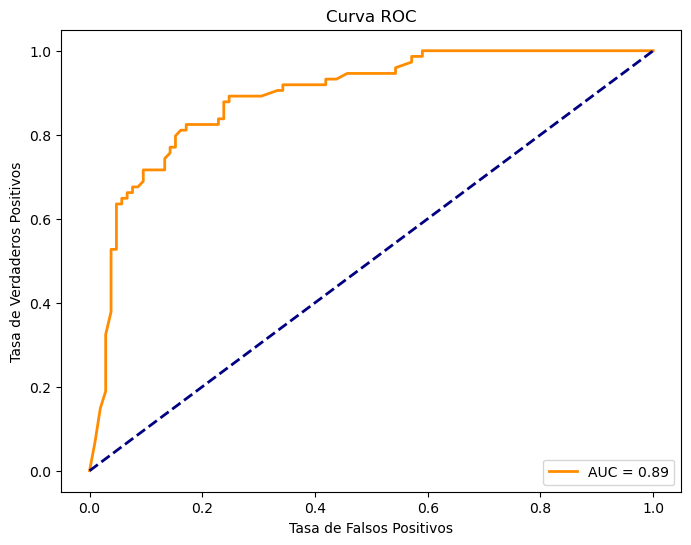

In [70]:
from sklearn.metrics import roc_curve, auc

# Calcular las probabilidades de las predicciones
y_prob = modelo.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


# IMPORTANCA DE LAS CARACTERISTICAS 

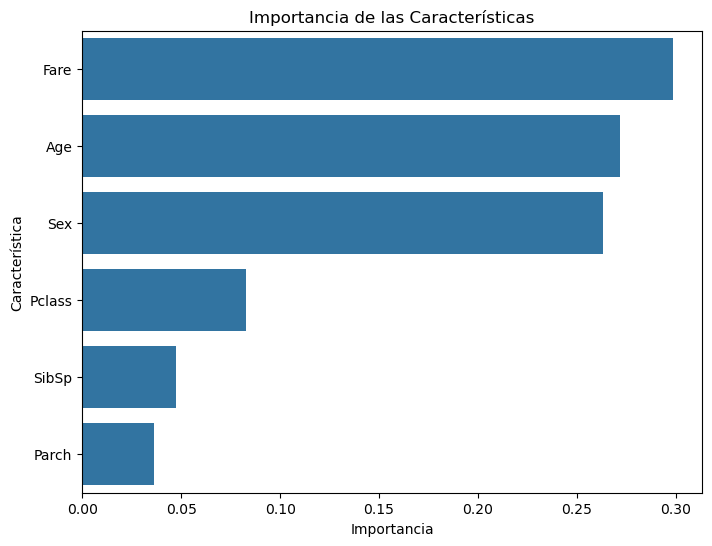

In [73]:
# Obtener la importancia de las características
importancia = modelo.feature_importances_

# Crear un DataFrame con las características y sus importancias
df_importancia = pd.DataFrame({'Característica': X.columns, 'Importancia': importancia})

# Ordenar las características por su importancia
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(8,6))
sns.barplot(x='Importancia', y='Característica', data=df_importancia)
plt.title('Importancia de las Características')
plt.show()


# VALIDACION CRUZADA 

In [76]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada
scores = cross_val_score(modelo, X, y, cv=5, scoring='accuracy')

# Imprimir los resultados
print(f"Precisión media de la validación cruzada: {scores.mean():.2f} ± {scores.std():.2f}")


Precisión media de la validación cruzada: 0.82 ± 0.04


# ANALISIS DE RESIDUOS

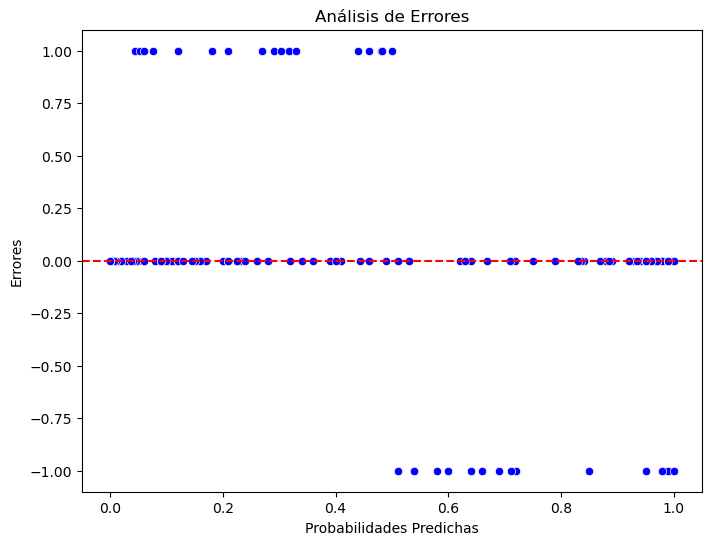

In [79]:
# Calcular los errores
errores = y_test - y_pred

# Graficar los errores vs las probabilidades predichas
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_prob, y=errores, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Probabilidades Predichas')
plt.ylabel('Errores')
plt.title('Análisis de Errores')
plt.show()


# REGRESION LOGISTICA 

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenar el modelo de regresión logística
modelo_logistico = LogisticRegression(random_state=42)
modelo_logistico.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_logistico = modelo_logistico.predict(X_test)


EVALUACION DEL MODELO

In [87]:
# Calcular y mostrar la exactitud
accuracy_logistico = accuracy_score(y_test, y_pred_logistico)
print(f"Exactitud del modelo de regresión logística: {accuracy_logistico:.2f}")


Exactitud del modelo de regresión logística: 0.82


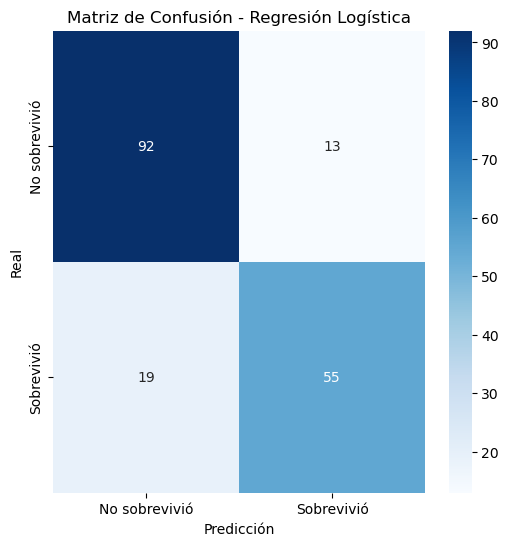

In [89]:
# Matriz de confusión
cm_logistico = confusion_matrix(y_test, y_pred_logistico)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 6))
sns.heatmap(cm_logistico, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()


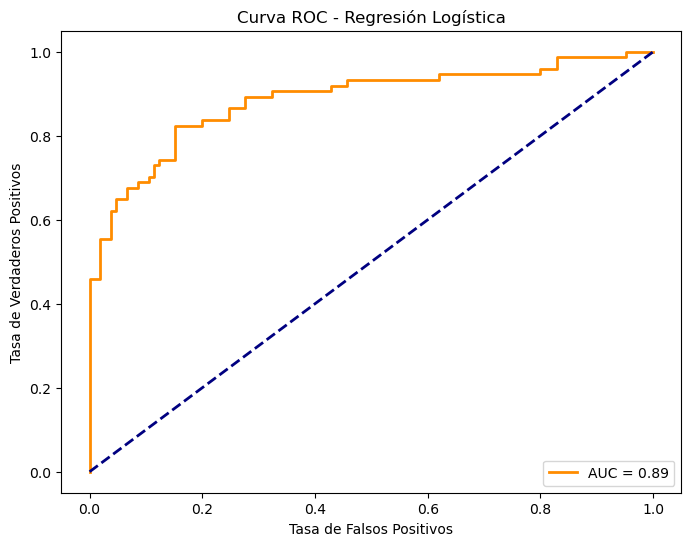

In [91]:
# Calcular las probabilidades de la regresión logística
y_prob_logistico = modelo_logistico.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr_logistico, tpr_logistico, _ = roc_curve(y_test, y_prob_logistico)
roc_auc_logistico = auc(fpr_logistico, tpr_logistico)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistico, tpr_logistico, color='darkorange', lw=2, label=f'AUC = {roc_auc_logistico:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc='lower right')
plt.show()
